# **Actividad 06: Métodos para encontrar raíces de funciones - Melanie Muñoz Chavarria**

##**Método de Bisección**

1. Diseñar un función que permita calcular los ceros de una función empleando el metodo de la bisección. El programa deberá recibir como parámetros los valores a, b, la función y una tolerancia.
```
def bisection(a, b, f, tolerencia):

  return root
```

2. Comparar su resultado empleando la libreria optmize de scipy




In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize

Antes de generalizar en una función, se usará el método de bisección para una función transcendente.

In [ ]:
funcion= lambda x: (x*np.exp(x)-1)

In [ ]:
#Analizando algunos valores de la función para ver su comportamiento, y entender en los puntos en los que es negativa y en los que es positiva.
print(funcion(-1),funcion(1),funcion(0))

-1.3678794411714423 1.718281828459045 -1.0


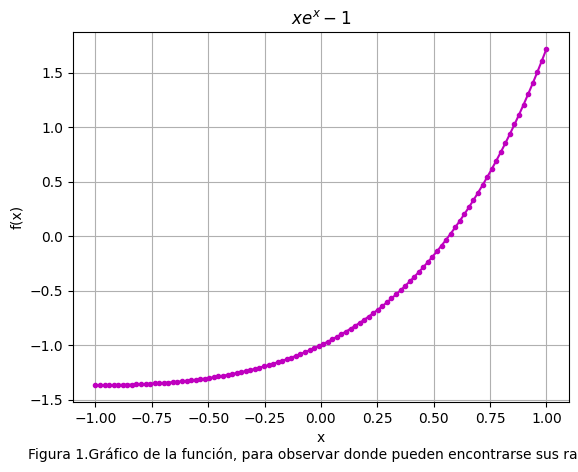

In [ ]:
#Ahora realizando un análisis gráfico de la función, para observar donde pueden encontrarse sus raices.
intervalo=np.linspace(-1,1,100) #Los valores entre los que se encuentra x
#Grafico
plt.figure()
plt.title('${{x}{e^{x}}-1}$')
plt.xlabel('''x
Figura 1.Gráfico de la función, para observar donde pueden encontrarse sus raices. ''')
plt.ylabel('f(x)')
plt.plot(intervalo,funcion(intervalo),'.m-')
plt.grid()

Como se muestra en la figura 1, las posibles raices pueden presentarse entre $ 0.5 \leq x \leq 0.8 $. Entonces observando los resultados para función evaluada en estos puntos:

In [ ]:
x=np.arange(0.5,0.8,0.01)
funcion(x)

array([-0.17563936, -0.15070149, -0.12534562, -0.09956588, -0.07335629,
       -0.04671084, -0.0196234 ,  0.00791222,  0.03590229,  0.06435317,
        0.09327128,  0.12266315,  0.15253539,  0.18289466,  0.21374776,
        0.24510154,  0.27696294,  0.309339  ,  0.34223686,  0.37566372,
        0.4096269 ,  0.44413379,  0.47919191,  0.51480884,  0.55099228,
        0.58775001,  0.62508993,  0.66302002,  0.70154837,  0.74068318,
        0.78043274])

Entonces en este intervalo iterando sobre los valores de a y b, esperando encontrar un c tal que $c \in [a,b]$ satisfaga que $f(c) \approx 0$

In [ ]:
#Puntos y su esvaluación en f
a=0.5
fa=funcion(a)
b=0.8
fb=funcion(b)
c=0
#Tolerancia
epsilon=1E-10

while (abs(funcion(c))>=epsilon) & ((fa*fb)<0): #Para alacanzar una aproximación a cero se usa el epsilon y que f(a) y f(b) siempre estén entre valores positivos y negativos,respectivamente
  c=(a+b)*0.5
  if funcion(c)>0:
    b=c
  else:
    a=c

print(c)


0.5671432903967797


###Función

In [ ]:
#Generalizando con una funcion
def bisection (a,b,f,tolerancia):
  c=0
  while (abs(f(c))>=tolerancia) & ((f(a)*f(b))<0):
    c=(a+b)*0.5
    if f(c)>0:
      b=c
    else:
      a=c
  return c

p=bisection(0.5,0.8,funcion,1E-10)
p

0.5671432903967797

###Comparación con scipy para la función ${{x}{e^{x}}-1}$


In [ ]:
raiz=optimize.bisect(funcion,a,b)
print(f'El valor con scipy es de {raiz}')
print(f'El valor con la función definida es {p}')
print(f'Comparando {p} con {raiz}, se tiene que {p/raiz}')

El valor con scipy es de 0.567143290408785
El valor con la función definida es 0.5671432903967797
Comparando 0.5671432903967797 con 0.567143290408785, se tiene que 0.999999999978832


##**Método de Newton-Raphson**
1. Diseñar un programa que permita calcular los ceros de una función empleando el metodo Newton-Raphson. La función deberá recibir como parámetros la funcion f, la derivada, la tolerancia y el punto de evaluación.
```
def newton(x0, f, fp, epsilon):

  return root
````
2. Comparar su resultado empleando la libreria optmize de scipy

Nuevamnte, antes de generalizar con una función el método. Se busca analizarla par auna caso particular. Haciendo una análisis de los resultados gráficos de la evaluación de la función para distintos valores de x.

In [ ]:
#Funciones
f=lambda x: (x-1)**2
df=lambda x: 2*(x-1)

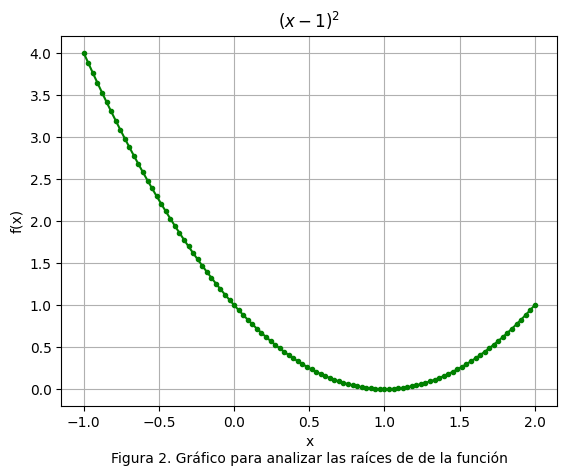

In [ ]:
#Grafico de la función para analizar dónde se pueden encontrar sus raíces.
x=np.linspace(-1,2,100)

plt.plot(x,f(x), '-g.')
plt.title('${{(x-1)}^{2}}$')
plt.ylabel('f(x)')
plt.xlabel('''x
Figura 2. Gráfico para analizar las raíces de de la función''')
plt.grid()

In [ ]:
#Iteración para acercarnos a la raíz de la función tomada en la figura 2.
x0=3 #Valor incial

while (abs(f(x0)>=epsilon)): #Iteración para redefinir valores en la formula dada para esté método
  xn=x0-(f(x0)/df(x0))
  x0=xn
  if df(x0)==0:
    raise ZeroDivisionError('La derivada se está haciendo cero') #Si en algún momento la derivada se hace cero, entonces, la formula dejará de funcionar

print(xn)

1.0000076293945312


###Función

In [ ]:
#Función para generalizar el método
def newton(x0,f,df,epsilon):
  while (abs(f(x0)>=epsilon)):
    xn=x0-(f(x0)/df(x0))
    x0=xn
    if df(x0)==0:
      raise ZeroDivisionError('La derivada se está haciendo cero')

  return(xn)

In [ ]:
#Definiendo una nueva función y analizando su resultado
f1=lambda x : x**2
df1=lambda x: 2**x

a=newton(3,f1,df1,1E-12)
b=newton(3,f,df,1E-12)
print(a,b)


9.999999448421565e-07 1.0000009536743164


###Comparación con Scipy $(x-1)^2$

In [ ]:
p=optimize.newton(f,3,df)
print(f'El valor con scipy es de {p}')
print(f'El valor con la función definida es {b}')
print(f'Comparando {b} con {p}, se tiene que {b/p}')

El valor con scipy es de 1.0000000074505806
El valor con la función definida es 1.0000009536743164
Comparando 1.0000009536743164 con 1.0000000074505806, se tiene que 1.0000009462237287


##**Método secante**

In [ ]:
#Funció de partida para encontrarle la raíz
fs=lambda x: (x-2)**2

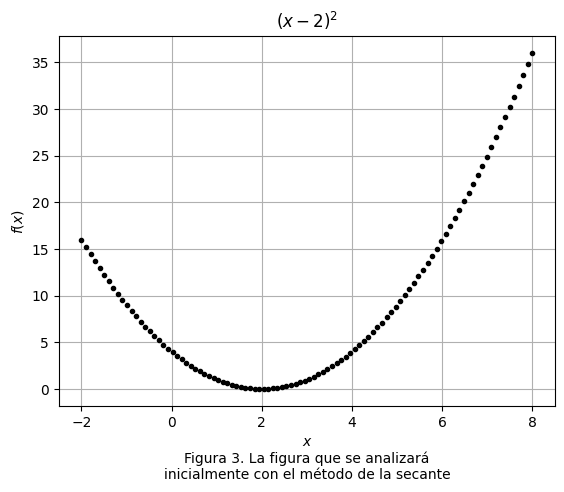

In [ ]:
#Figura para analizar dónde la función presenta los ceros
x=np.linspace(-2,8,100)

plt.figure()
plt.plot(x,fs(x),'k.')
plt.title('${(x-2)}^{2}$')
plt.xlabel('''${x}$
Figura 3. La figura que se analizará
inicialmente con el método de la secante''')
plt.ylabel('${f(x)}$')
plt.grid()

In [ ]:
x1=1
x2=3
x3= x2 - ((fs(x2)*(x2-x1))/(fs(x2)-f(x1)))
print(x3-x2)

-2.0


In [ ]:
#Iteración para concoer el valor de la raiz de fs

#Puntos
x0=6
x1=8

#Iteración
tolerancia_=1E-15
while (abs(x1-x0)>=tolerancia_): #Está iteración se detendrá cuando x1 sea aproximadamente x0, es decir que la distancia que los separe, sea casi cero
  x2= x1 - ((fs(x1)*(x1-x0))/(fs(x1)-fs(x0))) #Fomula del método
  x0=x1
  x1=x2

print(x2)

2.0000000000000013


###Función

In [ ]:
#Se define la siguiente función para generalizar el proceso y extenderlo a otras condiciones y diferentes fs.

def secante(fs,x0,x1,tolerancia_):
  while (abs(x1-x0)>=tolerancia_):
    x2= x1 - ((fs(x1)*(x1-x0))/(fs(x1)-fs(x0))) #Fomula del método
    x0=x1
    x1=x2
  return x2


k=secante(f1,5,13,tolerancia_)
k

1.4596383346928705e-15

###Comparación con Scipy para la función $(x-2)^2$

In [ ]:
#Si no se pasa la deriva para optimize se tiene el método de la secante
l=optimize.newton(fs,3)
j=secante(fs,4,8,1E-16)
print(f'El valor con scipy es de {l}')
print(f'El valor con la función definida es {j}')
print(f'Comparando {j} con {l}, se tiene que {j/l}')

El valor con scipy es de 2.0000000158151887
El valor con la función definida es 2.0000000000000004
Comparando 2.0000000000000004 con 2.0000000158151887, se tiene que 0.999999992092406


##**Método del punto fijo**

In [ ]:
#Función de partida para encontrar su raíz

f=lambda x: (x-1)**2
g=lambda x: x-f(x) #Esta es la función donde se resta la identidad y la función a la cuál se desea encontrarle las raices

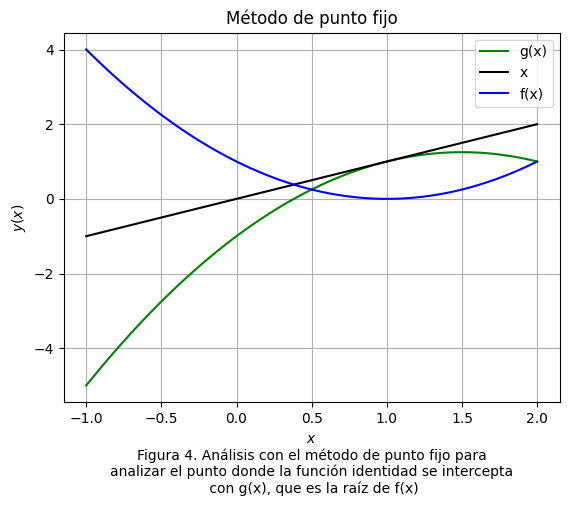

In [ ]:
#Gráfico para analizar el comportamiento de las funciones y los puntos donde se interceptan x y g(x), porque representan la raíz
x_i=np.linspace(-1,2,100)

plt.figure()

plt.plot(x_i,g(x_i),'-g',label='g(x)')

plt.plot(x_i,x_i,'-k',label='x')
plt.title('Método de punto fijo')
plt.plot(x_i,f(x_i),'-b', label='f(x)')
plt.xlabel('''${x}$
Figura 4. Análisis con el método de punto fijo para
analizar el punto donde la función identidad se intercepta
 con g(x), que es la raíz de f(x)''')
plt.ylabel('${y(x)}$')
plt.grid()
plt.legend()

In [ ]:
p0=1.5 #Se define el punto incial

epsilon=1E-12 #La tolerancia

while (abs(g(p0)-p0)>=epsilon): #Iteración para aplicar la recursividad de la linea de código anterior
  p1=g(p0)
  p0=p1

print(p1)

1.0000009999884065


In [ ]:
#Generalización para anilizar la raíz para múltiples funciones

def punto_fijo(f,p0,epsilon):
  g=lambda x: x-f(x)

  while (abs(g(p0)-p0)>=epsilon):
    p1=g(p0)
    p0=p1

  return p1

#Prueba para un función de la cuál se conoce su raíz
f_2=lambda x: x**2
a=punto_fijo(f_2,0.5,epsilon)
print(a)


9.999994164958746e-07


###Comparación con Scipy $(x-1)^2$

In [ ]:
b=punto_fijo(f,1.5,epsilon)
c=optimize.fixed_point(g,1.5)
print(f'El valor con scipy es de {c}')
print(f'El valor con la función definida es {b}')
print(f'Comparando {c} con {b}, se tiene que {c/b}')
print(b)
print(b/c)

El valor con scipy es de 1.0000026084539466
El valor con la función definida es 1.0000009999884065
Comparando 1.0000026084539466 con 1.0000009999884065, se tiene que 1.0000016084639316
1.0000009999884065
0.9999983915386556
